In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#material section
#usually I use csv files but this has very few data to be written in CSV

#the next section is geometry, this problem is called the BWR cell problem taken from Stepanek, et al., 1982

sigma_t_g_fuel= [1.96647*10**-1,
                  5.96159 * 10**-1 ]
sigma_t_g_mod = [ 2.22064*10**-1,
                  8.87874*10**-1] 
sigma_t_fm_g = np.array([sigma_t_g_fuel, sigma_t_g_mod])

nu_sigmaf_g_fuel = [6.203*10**-3,
                     1.101*10**-1]
nu_sigmaf_g_mod = [0,
                   0]
nu_sigmaf_fm_g = np.array([nu_sigmaf_g_fuel, nu_sigmaf_g_mod])

sigma_s_fuel_togfromg=np.array([[1.78*10**-1,  1.089 * 10**-3 ],
                           [1.002*10**-2, 5.255 * 10**-1]])
sigma_s_mod_togfromg=np.array([[1.995*10**-1, 1.558*10**-3],
                      [2.118*10**-2, 8.783*10**-1]])
sigma_s_fm_togfromg = np.array([sigma_s_fuel_togfromg, sigma_s_mod_togfromg])

kai_g_fm= [[1, 0], [0,0]]


In [10]:
azim = 12
X_max = 8.9
Y_max = 8.9
alpha = [1,1,1,1]
num_of_mesh_x = 20
num_of_mesh_y = 20

d_star = 0.2

h_x = X_max / num_of_mesh_x
h_y = Y_max / num_of_mesh_y
true_area = h_x*h_y
x_points = np.arange(0,X_max+h_x/2, h_x)
y_points = np.arange(0,Y_max+h_y/2, h_y)

x_i = (x_points[0:-1]+x_points[1:])/2
y_j = (y_points[0:-1]+y_points[1:])/2

def material(x,y):
    return 0  if(1.5<=x and 1<=y and x<= 7.9 and y<= 7.4) else 1

groups = 2
sigma_s_togfromg_i_j = np.zeros((groups, groups, num_of_mesh_x, num_of_mesh_y))
nu_sigmaf_g_i_j = np.zeros((groups, num_of_mesh_x, num_of_mesh_y))
sigma_t_g_i_j = np.zeros((groups, num_of_mesh_x, num_of_mesh_y))
kai_g_i_j = np.zeros((groups, num_of_mesh_x, num_of_mesh_y))
for i in range(len(x_i)):
    for j in range(len(y_j)):
        mat = material(x_i[i], y_j[j])
        sigma_s_togfromg_i_j[:,:,i,j] = sigma_s_fm_togfromg[mat] 
        nu_sigmaf_g_i_j[:,i,j] = nu_sigmaf_fm_g[mat]
        sigma_t_g_i_j[:,i,j] = sigma_t_fm_g[mat]
        kai_g_i_j[:,i,j] = kai_g_fm[mat]



In [96]:
#tabuchi_yamamoto quadrature set
polar =3



sintheta_p = np.array([.166648, .537707, .932954])
theta_p = (np.arcsin(sintheta_p))

w_p = 2*(np.array([0.046233, 0.283619, 0.670148]))


#azimuthal angle the angles in the definition given in 3.79 from azman rafee


B = int(azim/4)
w_b0 = np.pi/2/B
beta_b = np.arange(w_b0/2, np.pi/2, w_b0)
w_b = np.ones(int(B))*w_b0

print(beta_b)

np.cos(beta_b)

[0.26179939 0.78539816 1.30899694]


array([0.96592583, 0.70710678, 0.25881905])

In [97]:
#ray tracing data:

n_x = np.zeros(B)
n_y = np.zeros(B)
delta_x = np.zeros(B)
delta_y = np.zeros(B)
ray_spacing = np.zeros(B)

#calculation of corrected azimuthal angles
for b in range(B):
    n_x[b] = round(X_max/d_star * abs(np.sin(beta_b[b])))
    #print((X_max/d_star * abs(np.sin(beta_b[b]))))
    n_y[b] = round(Y_max/d_star * abs(np.cos(beta_b[b])))
    #print(round(Y_max/d_star * abs(np.cos(beta_b[b]))))
    delta_x[b] = X_max/n_x[b]
    #print(delta_x[b])
    delta_y[b] = Y_max/n_y[b]
    #print(delta_y[b])

    beta_b[b] = np.arctan(delta_y[b]/delta_x[b])
    ray_spacing[b] = delta_x[b]*delta_y[b]/np.sqrt(delta_x[b]**2+delta_y[b]**2)

w_b[0] = 1/2 * (beta_b[0]+beta_b[1])
for b in range(1,B):
    if(b==B-1):
        w_b[b] =np.pi/2 -  1/2*(beta_b[b-1]+beta_b[b])
        
    else:
        w_b[b] = 1/2*(beta_b[b+1]-beta_b[b-1])


x_0b = []

for b in range(B):
    x_0= list(np.arange(delta_x[b]/2, X_max, delta_x[b] ))
    x_0b.append(x_0)
print(x_0b)



[[0.37083333333333335, 1.1125, 1.8541666666666667, 2.595833333333333, 3.3375000000000004, 4.079166666666667, 4.820833333333334, 5.5625, 6.304166666666667, 7.045833333333334, 7.7875000000000005, 8.529166666666667], [0.1435483870967742, 0.4306451612903226, 0.717741935483871, 1.0048387096774194, 1.2919354838709678, 1.5790322580645162, 1.8661290322580646, 2.153225806451613, 2.4403225806451614, 2.72741935483871, 3.014516129032258, 3.3016129032258066, 3.588709677419355, 3.8758064516129034, 4.162903225806452, 4.45, 4.737096774193549, 5.024193548387097, 5.311290322580645, 5.598387096774194, 5.885483870967742, 6.172580645161291, 6.459677419354839, 6.746774193548387, 7.033870967741936, 7.320967741935484, 7.608064516129033, 7.895161290322581, 8.18225806451613, 8.469354838709677, 8.756451612903227], [0.10348837209302326, 0.3104651162790698, 0.5174418604651164, 0.7244186046511629, 0.9313953488372095, 1.1383720930232561, 1.3453488372093025, 1.5523255813953492, 1.7593023255813958, 1.9662790697674424,

In [98]:
#the list of object used in code for this class is ray_objects_k 
class single_ray_class:
    def __init__(self, mesh_reached, tracklengths_in_ray,boun_start,points_touched):
        self.mesh_reached = mesh_reached.copy()
        self.tracklengths_in_ray =tracklengths_in_ray.copy()
        self.num_of_tracks_in_ray = len(tracklengths_in_ray)
        self.real_track_lengths = np.empty((polar,self.num_of_tracks_in_ray))
        self.E_factor = np.empty(((polar,self.num_of_tracks_in_ray,groups)))
        self.boun_start = boun_start.copy()
        self.raw_track_lengths = np.empty((polar,self.num_of_tracks_in_ray))
        self.points_touched = points_touched.copy()

        

In [99]:
#the list of object used in code for this class is azimuthal_beta_objects_b
class azimuthal_beta_class:
    def __init__(self,ray_objects_k,sum_of_tk_orien_mesh,b):
        
        
        for k in range(len(ray_objects_k)):
            #the commented section below was intended to address area correction of tracklengths but did not work
            #for v in range ((ray_objects_k[k].num_of_tracks_in_ray)):
            
            #    ray_objects_k[k].tracklengths_in_ray[v] = ray_objects_k[k].tracklengths_in_ray[v]*true_area/(ray_spacing[b]*sum_of_tk_orien_mesh[ray_objects_k[k].mesh_reached[v][2],ray_objects_k[k].mesh_reached[v][0],ray_objects_k[k].mesh_reached[v][1]])
            for p in range(polar):
                ray_objects_k[k].real_track_lengths[p] = np.array(ray_objects_k[k].tracklengths_in_ray)/sintheta_p[p]
                for v in range(ray_objects_k[k].num_of_tracks_in_ray) :   
                    mat_fm = material(x_i[ray_objects_k[k].mesh_reached[v][0]],y_j[ray_objects_k[k].mesh_reached[v][1]])
                    ray_objects_k[k].E_factor[p,v] = 1-np.exp(-ray_objects_k[k].real_track_lengths[p,v] * sigma_t_fm_g[mat_fm])

            #print(b,k,np.amin(ray_objects_k[k].E_factor))
        


        self.ray_objects_k=ray_objects_k.copy()
        self.sum_l_o_i_j = sum_of_tk_orien_mesh.copy() 
        
        
        

In [100]:
def get_track_b_p_v_k(b,p,v,k):
    
    return azimuthal_beta_objects_b[b].ray_objects_k[k].real_track_lengths[p][v]

def get_raw_track_b_v_k(b,v,k):
    
    return azimuthal_beta_objects_b[b].ray_objects_k[k].tracklengths_in_ray[v]

def get_mesh_b_v_k(b,v,k):
    return azimuthal_beta_objects_b[b].ray_objects_k[k].mesh_reached[v]

def get_E_factor_b_p_v_k_g(b,p,v,k,g):
    return azimuthal_beta_objects_b[b].ray_objects_k[k].E_factor[p,v,g]

def get_boun_start_b_v_k(b,v,k):
    return azimuthal_beta_objects_b[b].ray_objects_k[k].boun_start[v]

def get_num_of_tracks_b_k(b,k):
    return azimuthal_beta_objects_b[b].ray_objects_k[k].num_of_tracks_in_ray

def get_sum_l_b_o_i_j(b,o,i,j):
    return azimuthal_beta_objects_b[b].sum_l_o_i_j[o,i,j]

def get_start_point_b_v_k(b,v,k):
    return [azimuthal_beta_objects_b[b].ray_objects_k[k].points_touched[0,v],azimuthal_beta_objects_b[b].ray_objects_k[k].points_touched[1,v]]

In [101]:


azimuthal_beta_objects_b = []
total_tracks = 0

num_of_rays_in_beta_b = []
for b in range(B):
    print(b)
    sum_of_tk_orien_mesh = np.zeros((2,num_of_mesh_x, num_of_mesh_y))

    ray_objects_k = []
    beta = beta_b[b]
    m= np.tan(beta)
    x_0b_size = len(x_0b[b])
    ray = 0
    
    while(ray<x_0b_size):
        mesh_shift_x = int(1)
        mesh_shift_y = int(1)

        mesh_reached=[]
        interceptsx = []
        interceptsy = []
        tracklengths_in_ray = []
        
        #find the mesh to start the ray from
        mesh_boun_x_behind=0
        mesh_boun_y_behind=0
        for mesh_boun_x_behind in range(len(x_points)):
            if(x_0b[b][ray]<x_points[mesh_boun_x_behind]):
                break
        mesh_boun_x_behind=mesh_boun_x_behind-1
       
        
        # entering mesh mesh_boun_x_behind,mesh_boun_y_behind starting at (x_0,0)
        mesh_now = [mesh_boun_x_behind,mesh_boun_y_behind, 0] # mesh reached with a orientation 0 or 1
        
        point_old = np.array([x_0b[b][ray],0])
        point_now = np.array([x_0b[b][ray],0])
        points_touched=[]
        interceptsx.append(point_now[0])
        interceptsy.append(point_now[1])
        track_len_in_mesh = np.zeros(0)
        boun_start = [0] 
        orien = 0
        
        #print('angle',b ,'ray',ray,"enterd", [point_now[0],point_now[1]], mesh_now,'ray:', ray,'from boun', boun_start)
        
        track_number_in_ray = 0
        while(1):
            v = track_number_in_ray
            total_tracks = total_tracks+1

            orien = 0 if m>0 else 1
            mesh_now[2] = orien
            
            vertical_cut = m*(x_points[mesh_boun_x_behind+mesh_shift_x]-point_now[0])
            
            if(b==0 and ray==0 and mesh_now==[4,0,0]):
                print('angle',b ,'ray',ray,"enterd", mesh_now,'through', [point_now[0],point_now[1]],'track_number:', track_number_in_ray,'from boun', boun_start[-1])                
            if(abs(abs(vertical_cut)-abs(y_points[mesh_boun_y_behind+mesh_shift_y]-point_now[1]))<10**-13):

                #    print('igonred:', b,ray,v)
                #    print('igonred','angle',b ,'ray',ray,"enterd", [point_now[0],point_now[1]],mesh_now,'ray:', ray,'track_number:', track_number_in_ray,'from boun', boun_start[-1])                
                horizontal_cut = x_points[mesh_boun_x_behind+mesh_shift_x] - point_now[0]
                
                track_len_in_mesh = np.sqrt(horizontal_cut**2+vertical_cut**2)
                tracklengths_in_ray.append(track_len_in_mesh)
                
                
                sum_of_tk_orien_mesh[orien, mesh_now[0],mesh_now[1]] = sum_of_tk_orien_mesh[orien, mesh_now[0],mesh_now[1]]+track_len_in_mesh

                mesh_reached.append(mesh_now.copy())

                
                point_now[0] = x_points[mesh_boun_x_behind+mesh_shift_x]
                point_now[1] = point_now[1] + abs(vertical_cut)*mesh_shift_y

                mesh_boun_x_behind=mesh_boun_x_behind+mesh_shift_x
                mesh_boun_y_behind = mesh_boun_y_behind+mesh_shift_y

                mesh_now[0] = mesh_now[0]+mesh_shift_x
                mesh_now[1] = mesh_now[1]+mesh_shift_y 
                                    
            elif(abs(vertical_cut)<abs(y_points[mesh_boun_y_behind+mesh_shift_y]-point_now[1])):

                horizontal_cut = x_points[mesh_boun_x_behind+mesh_shift_x] - point_now[0]
                                
                track_len_in_mesh = np.sqrt(horizontal_cut**2+vertical_cut**2)
                tracklengths_in_ray.append(track_len_in_mesh)                
                
                sum_of_tk_orien_mesh[orien, mesh_now[0],mesh_now[1]] = sum_of_tk_orien_mesh[orien, mesh_now[0],mesh_now[1]]+track_len_in_mesh
                mesh_reached.append(mesh_now.copy())

                #    print('angle',b ,'ray',ray,"exit",[point_now[0],point_now[1]],'from',  mesh_reached[-1], 'ray:', ray,'track_number:', track_number_in_ray,'len', track_len_in_mesh,'sum', sum_of_tk_orien_mesh[mesh_now[0],mesh_now[1]])
                point_now[0] = x_points[mesh_boun_x_behind+mesh_shift_x]
                point_now[1] = point_now[1]+abs(vertical_cut)*mesh_shift_y

                mesh_boun_x_behind=mesh_boun_x_behind+mesh_shift_x
                mesh_now[0] = mesh_now[0]+mesh_shift_x 
                                    
            else:
                
                #    print('angle',b ,'ray',ray,"enterd", [point_now[0],point_now[1]],mesh_now, 'ray:', ray,'track_number:', track_number_in_ray,'from boun',boun_start[-1])

                
                
                vertical_cut = y_points[mesh_boun_y_behind+mesh_shift_y] - point_now[1]                
                horizontal_cut = vertical_cut/m
                
                track_len_in_mesh = np.sqrt(horizontal_cut**2+vertical_cut**2)
                tracklengths_in_ray.append(track_len_in_mesh)

                sum_of_tk_orien_mesh[orien, mesh_now[0],mesh_now[1]] = sum_of_tk_orien_mesh[orien, mesh_now[0],mesh_now[1]]+track_len_in_mesh
                mesh_reached.append(mesh_now.copy())
            
                #    print('angle',b ,'ray',ray,"exit", [point_now[0],point_now[1]],'from', mesh_reached[-1], 'ray:', ray,'track_number:', track_number_in_ray,'len', track_len_in_mesh, track_number_in_ray,'sum', sum_of_tk_orien_mesh[mesh_now[0],mesh_now[1]])
                
                point_now[0] = point_now[0]+abs(horizontal_cut)*mesh_shift_x
                point_now[1] = y_points[mesh_boun_y_behind+mesh_shift_y]
                mesh_boun_y_behind = mesh_boun_y_behind+mesh_shift_y
                mesh_now[1] = mesh_now[1]+mesh_shift_y

            track_number_in_ray=track_number_in_ray+1
            interceptsx.append(point_now[0])
            interceptsy.append(point_now[1])

            #print('next mesh withount boundary correction:',mesh_now)
            #now it's time to reflect some rays
            boun = -1
            if(point_now[0]==x_points[-1]):
                boun = 1
                #here at right boundary 
                
                mesh_shift_x = -1
                mesh_now[0] = num_of_mesh_x-1
                
                mesh_shift_y= int(np.sign(np.sin(beta))) #so is this
                
                

                beta = np.pi-mesh_shift_y*beta_b[b] #its okay you thought about it already

                m=np.tan(beta)
                

                #print(b,ray,[point_now[0],point_now[1]], mesh_now, boun_start[-1],track_number_in_ray)

            if(point_now[1]>y_points[-1] or abs(point_now[1]-y_points[-1])<10**-13 ):
                boun =2
                #here at upper boundary
                mesh_shift_y = -1
                mesh_now[1] = num_of_mesh_y-1
                mesh_shift_x= int(np.sign(np.cos(beta)))
                

                beta = 3/2*np.pi+mesh_shift_x*(np.pi/2 - beta_b[b])
                m = np.tan(beta)
               

                #print(b,ray,[point_now[0],point_now[1]], mesh_now, boun_start[-1],track_number_in_ray)

            if(point_now[0]==0):
                boun = 3
                #here at left boundary
                mesh_shift_x = 1
                mesh_now[0] = 0
                mesh_shift_y= int(np.sign(np.sin(beta)))
                

                beta = np.pi-mesh_shift_y*(np.pi-beta_b[b])
                m = np.tan(beta)

                #print(b,ray,[point_now[0],point_now[1], mesh_now, boun_start[-1],track_number_in_ray)
                

            if((point_now[1])<10**-13):
                boun = 0
                #here at lower boundary, here the ray might terminate, so this part of if is big, here we also delete unnecessary ray starting point
                mesh_shift_y = 1
                mesh_now[1] = 0
                mesh_shift_x= int(np.sign(np.cos(beta)))
                

                beta = np.pi/2-mesh_shift_x*(np.pi/2 - beta_b[b])
                m = np.tan(beta)
                orien = 0 if m>0 else 1
                #here we also delete unnecessary ray starting point
                ind = ray+1
                #ray delete
                while(ind<x_0b_size ):
                    if(abs(x_0b[b][ind]-point_now[0])<10**-10):
                        #print( [x_0b[b][ind],point_now[0]])
                        x_0b[b].pop(ind)
                        x_0b_size = len(x_0b[b])
                        ind = ind-1
                        #print('deleted','angle', b, 'ray', ind, 'now rays', x_0b_size)
                            
                    ind=ind+1                
                
                       
                
                #print(b,ray,[point_now[0],point_now[1]], mesh_now, boun_start[-1],track_number_in_ray)
                if(abs(point_now[0] - x_0b[b][ray])<10**-10):
                    #print(b,v,ray, [point_now[0], x_0b[b][ray]])
                    points_touched=[interceptsx.copy(), interceptsy.copy()]
                    boun_start.append(boun)
                    #if(b==0):
                    #    plt.plot(interceptsx,interceptsy,linewidth=.25)
                    break
            #print('angle',b ,'ray',ray,"exit to",mesh_now,'through', [point_now[0],point_now[1]],'to boun', boun ,'track_number:', track_number_in_ray,'len', track_len_in_mesh, track_number_in_ray,'sum', sum_of_tk_orien_mesh[mesh_now[0],mesh_now[1]])
        
            boun_start.append(boun)
                
            
 
        
           
        ray_objects_k.append(single_ray_class(mesh_reached, np.array(tracklengths_in_ray),boun_start,np.array(points_touched)))
        
        #print(b,ray,len(mesh_reached), len(boun_start))   
        ray = ray+1
    num_of_rays_in_beta_b.append(x_0b_size)
    print(ray_objects_k)
    azimuthal_beta_objects_b.append(azimuthal_beta_class(ray_objects_k,sum_of_tk_orien_mesh,b))
    #print(b,np.min(azimuthal_beta_objects_b[b].ray_objects_k[0].E_factor))




#xx,yy = np.meshgrid(x_points,y_points)
#plt.plot(xx, yy,color='black',linewidth=0.5)
#plt.plot(yy,xx, color ='black', linewidth = 0.5)


0
angle 0 ray 0 enterd [4, 0, 0] through [0.89, 0.14488372093023255] track_number: 3 from boun -1


1
[<__main__.single_ray_class object at 0x0000025CF4B458D0>, <__main__.single_ray_class object at 0x0000025CF4B37B90>, <__main__.single_ray_class object at 0x0000025CF4B34B50>, <__main__.single_ray_class object at 0x0000025CF4B499D0>, <__main__.single_ray_class object at 0x0000025CF4AC5410>, <__main__.single_ray_class object at 0x0000025CF6675690>, <__main__.single_ray_class object at 0x0000025CF7E4D190>, <__main__.single_ray_class object at 0x0000025CF7E4F8D0>, <__main__.single_ray_class object at 0x0000025CF6672210>, <__main__.single_ray_class object at 0x0000025CF7E58A90>, <__main__.single_ray_class object at 0x0000025CF7E5BB90>, <__main__.single_ray_class object at 0x0000025CF7E8FBD0>, <__main__.single_ray_class object at 0x0000025CF7E80710>, <__main__.single_ray_class object at 0x0000025C805504D0>, <__main__.single_ray_class object at 0x0000025C869419D0>, <__main__.single_ray_class object at 0x0000025C86942E90>, <__main__.single_ray_class object at 0x0000025C86875790>, <__main__.s

%matplotlib qt
plt.imshow(azimuthal_beta_objects_b[b].sum_l_o_i_j[0]+azimuthal_beta_objects_b[b].sum_l_o_i_j[0])

In [102]:
def two_D_sweep(q_i_j, Q_i_j,psi, g):
    psi_boun = []
    psi_in_b_p_k = psi.copy()
    flux_i_j = q_i_j/(sigma_t_g_i_j[g]) #this q_i will be different for each mesh
    for b in range(B):
        for k in range(num_of_rays_in_beta_b[b]):
            v=0
            direction = 1 #this means ray is traced forward so v increment by one and backward v decrement 1
            bounce = 1 #while going forard it looks for boundary at next mesh, when going backward looks four boundary at own mesh
            V=get_num_of_tracks_b_k(b,k)
            while(v>=0):
                
                [i, j, o] = get_mesh_b_v_k(b,v,k)
                hit_boun = get_boun_start_b_v_k(b,v+bounce,k)
                #print('point',get_nextpoint_b_v_k(b,v+bounce,k))
                #print( 'track', get_raw_track_b_v_k(b,v,k),'sum', get_sum_l_b_i_j(b,i,j))
                for p in range(polar):
                    
                    del_psi = get_E_factor_b_p_v_k_g(b,p,v,k,g)*(psi_in_b_p_k[b][p,k]-Q_i_j[i,j]/sigma_t_g_i_j[g,i,j])
                    
                    flux_i_j[i,j]=flux_i_j[i,j] +  (w_b[b]*w_p[p]*sintheta_p[p] * del_psi ) / (sigma_t_g_i_j[g,i,j]*get_sum_l_b_o_i_j(b,o,i,j))

                    psi_in_b_p_k[b][p,k] = psi_in_b_p_k[b][p,k] - del_psi
                #print(np.round(flux_i_j.copy(), decimals=4, out=None))
                #print(b,v,k,psi_in_b_p_k[b][:,k])
                
                
                #print('b',b,'v',v,'k',k,[i,j], hit_boun,psi_in_b_p_k[b][:,k])

                if(hit_boun !=-1):
                    if(get_raw_track_b_v_k(b,v,k)>10**-13):
                         
                        psi_boun.append(np.array(psi_in_b_p_k[b][:,k]))               
                    #print('boun',b,v,k,hit_boun,psi_in_b_p_k[b][:,k]) 
                    #print(psi_boun)   
                    psi_in_b_p_k[b][:,k] = alpha[hit_boun]*psi_in_b_p_k[b][:,k]
                    #print('boun',psi_in_b_p_k)

                
                
                v = v + direction
                if(v==V):
                    direction = -1
                    v = v+direction
                    bounce = 0

                
    return flux_i_j.copy(), psi_in_b_p_k.copy(), psi_boun.copy()


In [103]:
keff = 1.0
keff_new = 1.0

psi_in = [[]for g in range(groups)]
for b in range(B):
    psi = np.zeros((polar,num_of_rays_in_beta_b[b]))
    psi_in[0].append(psi.copy())

for g in range(groups):
    psi_in[g] = psi_in[0].copy() 



flux_old_g = np.ones((groups,num_of_mesh_x, num_of_mesh_y)) 
flux_new_g = np.zeros((groups,num_of_mesh_x, num_of_mesh_y))
res_keff = np.inf
res_flux= np.inf
res_psi = np.inf


fission_source_g_ij = kai_g_i_j*sum(nu_sigmaf_g_i_j*flux_old_g)

q_g_ij = np.ones((groups,num_of_mesh_x, num_of_mesh_y))
fission_source_new_g_ij = np.zeros((groups,num_of_mesh_x, num_of_mesh_y))
sweep = 0
power = 0
q_ind_g_ij = fission_source_g_ij/keff



In [104]:
print(np.shape(fission_source_g_ij[0]))

(40, 40)


In [ ]:

while(res_keff>10**-5):
    q_ind_g_ij = fission_source_g_ij/keff
    power = power+1
    for to_g in range(groups):
        for from_g in range(groups):
            if(to_g != from_g):
                q_ind_g_ij[to_g] = q_ind_g_ij[to_g] + flux_old_g[from_g] * sigma_s_togfromg_i_j[to_g,from_g]

    for g in range(groups):
        res_flux = np.inf
        while(res_flux > 10**-6 or res_psi > 10**-6):
            q_g_ij[g] = q_ind_g_ij[g] + sigma_s_togfromg_i_j[g,g] * flux_old_g[g]
            Q_i_j = q_g_ij[g]/(4*np.pi)
            flux_new_g[g,:] , psi_in[g], psi_boun_all= two_D_sweep(q_g_ij[g],Q_i_j, psi_in[g], g)
            psi_boun_all = np.array(psi_boun_all)

            if(sweep == 0):
                psi_boun_all_old = psi_boun_all.copy()
                res_psi=np.inf
            else:
                
                res_psi = np.amax(abs(psi_boun_all-psi_boun_all_old)/psi_boun_all)

            
            sweep=sweep+1
            psi_boun_all_old = psi_boun_all.copy()
        
            res_flux = np.amax(abs((flux_new_g[g]-flux_old_g[g])/flux_new_g[g]))
            
            print('flux error',res_flux, 'psi error:', res_psi, 'min:', np.min(flux_new_g[g]))
    
            flux_old_g[g] = flux_new_g[g].copy()


    fission_source_new_g_ij = kai_g_i_j*sum(nu_sigmaf_g_i_j*flux_new_g)
    keff_new = keff* np.sum(fission_source_new_g_ij*true_area)/np.sum(fission_source_g_ij*true_area)
    print('keff',keff_new, 'with error:', res_keff)

    res_keff = abs(keff-keff_new)
    #print(res_keff)
    keff = keff_new
    fission_source_g_ij = fission_source_new_g_ij


In [ ]:
%matplotlib qt
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y = np.meshgrid(x_i,y_j)
X= np.transpose(X)
Y = np.transpose(Y)
Z = flux_new_g[0]

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='coolwarm', lw=0.5, rstride=2, cstride=2,
                alpha=0.5)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='x', cmap='coolwarm')
ax.contour(X, Y, Z , zdir='y', cmap='coolwarm')
ax.contour(X, Y, Z,  zdir='x', cmap='coolwarm')
ax.contour(X, Y, Z , zdir='y', cmap='coolwarm')

ax.set(
    xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

In [ ]:
import pandas as pd
df=pd.DataFrame(flux_new_g[0])
df.to_csv('azman_rafee_benchmark_3_group_1.csv', index=False)
df=pd.DataFrame(flux_new_g[1])
df.to_csv('azman_rafee_benchmark_3_group_2.csv', index=False)

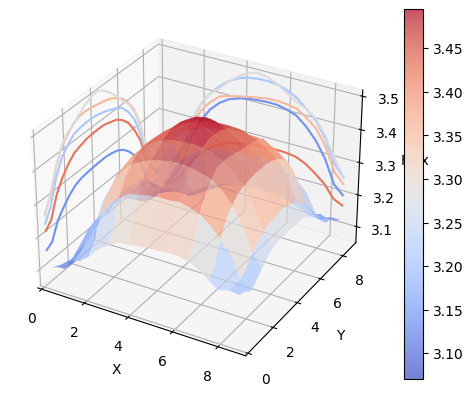

In [14]:
%matplotlib qt
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x_i,y_j)
X= np.transpose(X)
Y = np.transpose(Y)
Z = flux_new_g[0]

# Plot the 3D surface
surf = ax.plot_surface(X, Y, Z,cmap='coolwarm',lw=0.5 ,rstride=1, cstride=1,
                alpha = 0.7)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, offset=0, zdir='x', cmap='coolwarm')
ax.contour(X, Y, Z , offset=0, zdir='y', cmap='coolwarm')

ax.set(xlim = (-0,9), ylim=(0,9),
    xlabel='X', ylabel='Y', zlabel='Flux')
fig.colorbar(surf)
plt.show()

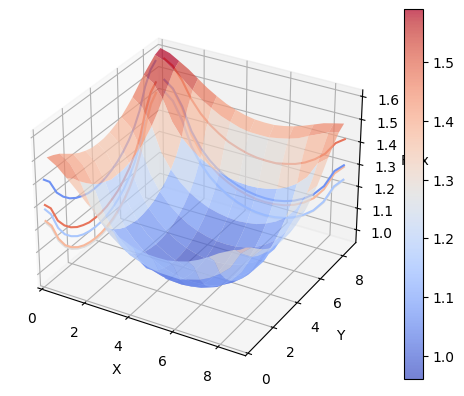

In [16]:
%matplotlib qt
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x_i,y_j)
X= np.transpose(X)
Y = np.transpose(Y)
Z = flux_new_g[1]

# Plot the 3D surface
surf = ax.plot_surface(X, Y, Z,cmap='coolwarm',lw=0.5 ,rstride=1, cstride=1,
                alpha = 0.7)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, offset=0, zdir='x', cmap='coolwarm')
ax.contour(X, Y, Z , offset=0, zdir='y', cmap='coolwarm')

ax.set(xlim = (-0,9), ylim=(0,9),
    xlabel='X', ylabel='Y', zlabel='Flux')
fig.colorbar(surf)
plt.show()